In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
filename ='original_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)

In [3]:
dataframe.shape

(757, 755)

In [4]:
dataframe.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


In [5]:
new_header = dataframe.iloc[0] #grab the first row for the header
dataframe = dataframe[1:] #take the data less the header row
dataframe.columns = new_header #set the header row as the df header

In [6]:
new_header

Unnamed: 0                                  id
Unnamed: 1                              gender
Baseline Features                          PPE
Unnamed: 3                                 DFA
Unnamed: 4                                RPDE
                               ...            
Unnamed: 750         tqwt_kurtosisValue_dec_33
Unnamed: 751         tqwt_kurtosisValue_dec_34
Unnamed: 752         tqwt_kurtosisValue_dec_35
Unnamed: 753         tqwt_kurtosisValue_dec_36
Unnamed: 754                             class
Name: 0, Length: 755, dtype: object

In [7]:
dataframe

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,250,0,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,...,3.0706,3.019,3.1212,2.4921,3.5844,3.54,3.3805,3.2003,6.8671,0
753,250,0,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.417,0
754,251,0,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
755,251,0,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [8]:
dataframe.columns.shape

(755,)

In [9]:
dataframe.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
5,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


# Data Extraction from the dataset
Baseline Features: Column-3 to Column-23 Intensity Parameters: Col24 to Col26 Formant Frequencies: Col27 to Col30 Bandwidth Parameters: Col31 to Col34 Vocal Fold: Col35 to Col56 MFCC: Col57 to Col140 Wavelet Features: Col141 to Col322 TQWT Features: Col323 to Col754 Class: Col755

Refer Research Page: 6 - 9

In [10]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:755]
y = dataframe['class']

In [11]:
baseline

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity
1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,1.76E-05,0.00067,...,0.002,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995
2,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,1.61E-05,0.00052,...,0.00157,0.05516,0.502,0.0232,0.03675,0.06195,0.06961,0.984322,0.017974,21.497
3,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,1.47E-05,0.00057,...,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651
4,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55E-05,0.00149,...,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865
5,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37E-05,0.00166,...,0.00499,0.0561,0.497,0.02909,0.03327,0.05278,0.08728,0.975754,0.027139,19.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.80903,0.56355,0.28385,417,416,0.004626942,5.22E-05,0.00064,2.97E-06,8.00E-05,...,0.00024,0.01947,0.171,0.01068,0.0126,0.01547,0.03204,0.997438,0.002571,26.813
753,0.16084,0.56499,0.59194,415,413,0.004549703,0.000219994,0.00143,6.50E-06,0.00016,...,0.00047,0.04291,0.482,0.02307,0.02626,0.03272,0.0692,0.976867,0.025519,17.802
754,0.88389,0.72335,0.46815,381,380,0.005069271,0.000102654,0.00076,3.87E-06,0.00011,...,0.00034,0.02978,0.263,0.01597,0.01916,0.02271,0.0479,0.995544,0.00448,24.005
755,0.83782,0.7489,0.49823,340,339,0.005679019,5.51E-05,0.00092,5.24E-06,0.00017,...,0.00052,0.03552,0.311,0.01791,0.02348,0.02648,0.05373,0.988241,0.011931,19.706


# Baseline Columns


In [12]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

In [13]:
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth,y])
extracted_df.shape

(756, 28)

# Exploratory_data_analysis

In [14]:
extracted_df.columns #checking columns

Index(['ddpJitter', 'locPctJitter', 'ppq5Jitter', 'locAbsJitter',
       'locDbShimmer', 'DFA', 'RPDE', 'locShimmer', 'apq5Shimmer', 'numPulses',
       'apq3Shimmer', 'apq11Shimmer', 'PPE', 'rapJitter', 'numPeriodsPulses',
       'ddaShimmer', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1',
       'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'class'],
      dtype='object')

In [15]:
extracted_df= extracted_df.astype(float) #converting data types from object to float
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ddpJitter         756 non-null    float64
 1   locPctJitter      756 non-null    float64
 2   ppq5Jitter        756 non-null    float64
 3   locAbsJitter      756 non-null    float64
 4   locDbShimmer      756 non-null    float64
 5   DFA               756 non-null    float64
 6   RPDE              756 non-null    float64
 7   locShimmer        756 non-null    float64
 8   apq5Shimmer       756 non-null    float64
 9   numPulses         756 non-null    float64
 10  apq3Shimmer       756 non-null    float64
 11  apq11Shimmer      756 non-null    float64
 12  PPE               756 non-null    float64
 13  rapJitter         756 non-null    float64
 14  numPeriodsPulses  756 non-null    float64
 15  ddaShimmer        756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [16]:
#checking for missing values
extracted_df.isnull().sum()

ddpJitter           0
locPctJitter        0
ppq5Jitter          0
locAbsJitter        0
locDbShimmer        0
DFA                 0
RPDE                0
locShimmer          0
apq5Shimmer         0
numPulses           0
apq3Shimmer         0
apq11Shimmer        0
PPE                 0
rapJitter           0
numPeriodsPulses    0
ddaShimmer          0
minIntensity        0
maxIntensity        0
meanIntensity       0
f1                  0
f2                  0
f3                  0
f4                  0
b1                  0
b2                  0
b3                  0
b4                  0
class               0
dtype: int64

In [17]:
extracted_df.describe()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,class
count,756.000000,756.000000,756.000000,7.560000e+02,756.00000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.001815,0.002324,0.001159,1.673391e-05,0.60642,0.700414,0.489058,0.067473,0.041175,323.972222,...,73.997008,647.174519,1233.852088,2562.425251,3547.259244,213.363237,297.174077,536.821070,506.604856,0.746032
std,0.002942,0.002628,0.001677,2.290134e-05,0.38257,0.069718,0.137442,0.042969,0.027165,99.219059,...,7.018006,134.957916,169.090402,393.315598,347.864299,306.976045,450.125488,754.341717,658.326606,0.435568
min,0.000050,0.000210,0.000050,6.860000e-07,0.05700,0.543500,0.154300,0.006560,0.004150,2.000000,...,39.984109,237.149533,761.357661,1411.231297,2471.996546,13.525000,16.428803,21.164397,22.842528,0.000000
25%,0.000450,0.000970,0.000370,5.260000e-06,0.31875,0.647053,0.386537,0.036097,0.021935,251.000000,...,70.920615,562.879119,1117.316190,2380.426103,3288.644496,90.939702,102.856320,152.783110,170.741827,0.000000
50%,0.000840,0.001495,0.000650,9.530000e-06,0.50250,0.700525,0.484355,0.055730,0.033705,317.000000,...,76.855313,641.181498,1215.344125,2612.204198,3544.012403,141.610973,159.991186,265.964575,307.971279,1.000000
75%,0.001952,0.002520,0.001253,1.832500e-05,0.79650,0.754985,0.586515,0.085547,0.053023,384.250000,...,78.718785,737.222678,1339.826741,2831.959198,3807.332055,234.098376,299.912765,518.822036,557.628796,1.000000
max,0.033150,0.027750,0.018320,2.564800e-04,2.11400,0.852640,0.871230,0.251010,0.199510,907.000000,...,85.096353,1015.524047,1922.747225,3475.648017,4482.258531,4744.875736,4262.170070,6116.039922,5804.342078,1.000000


# Univariate Analysis

# Count Plot

/home/sushmita/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


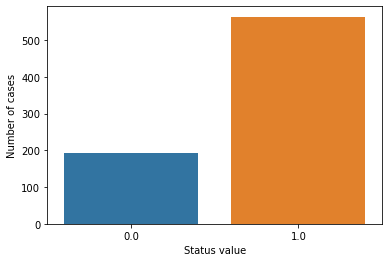

In [18]:
sns.countplot(extracted_df['class'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

In [19]:
len(extracted_df.columns)

28

# Data visualization

# Distribution Plot

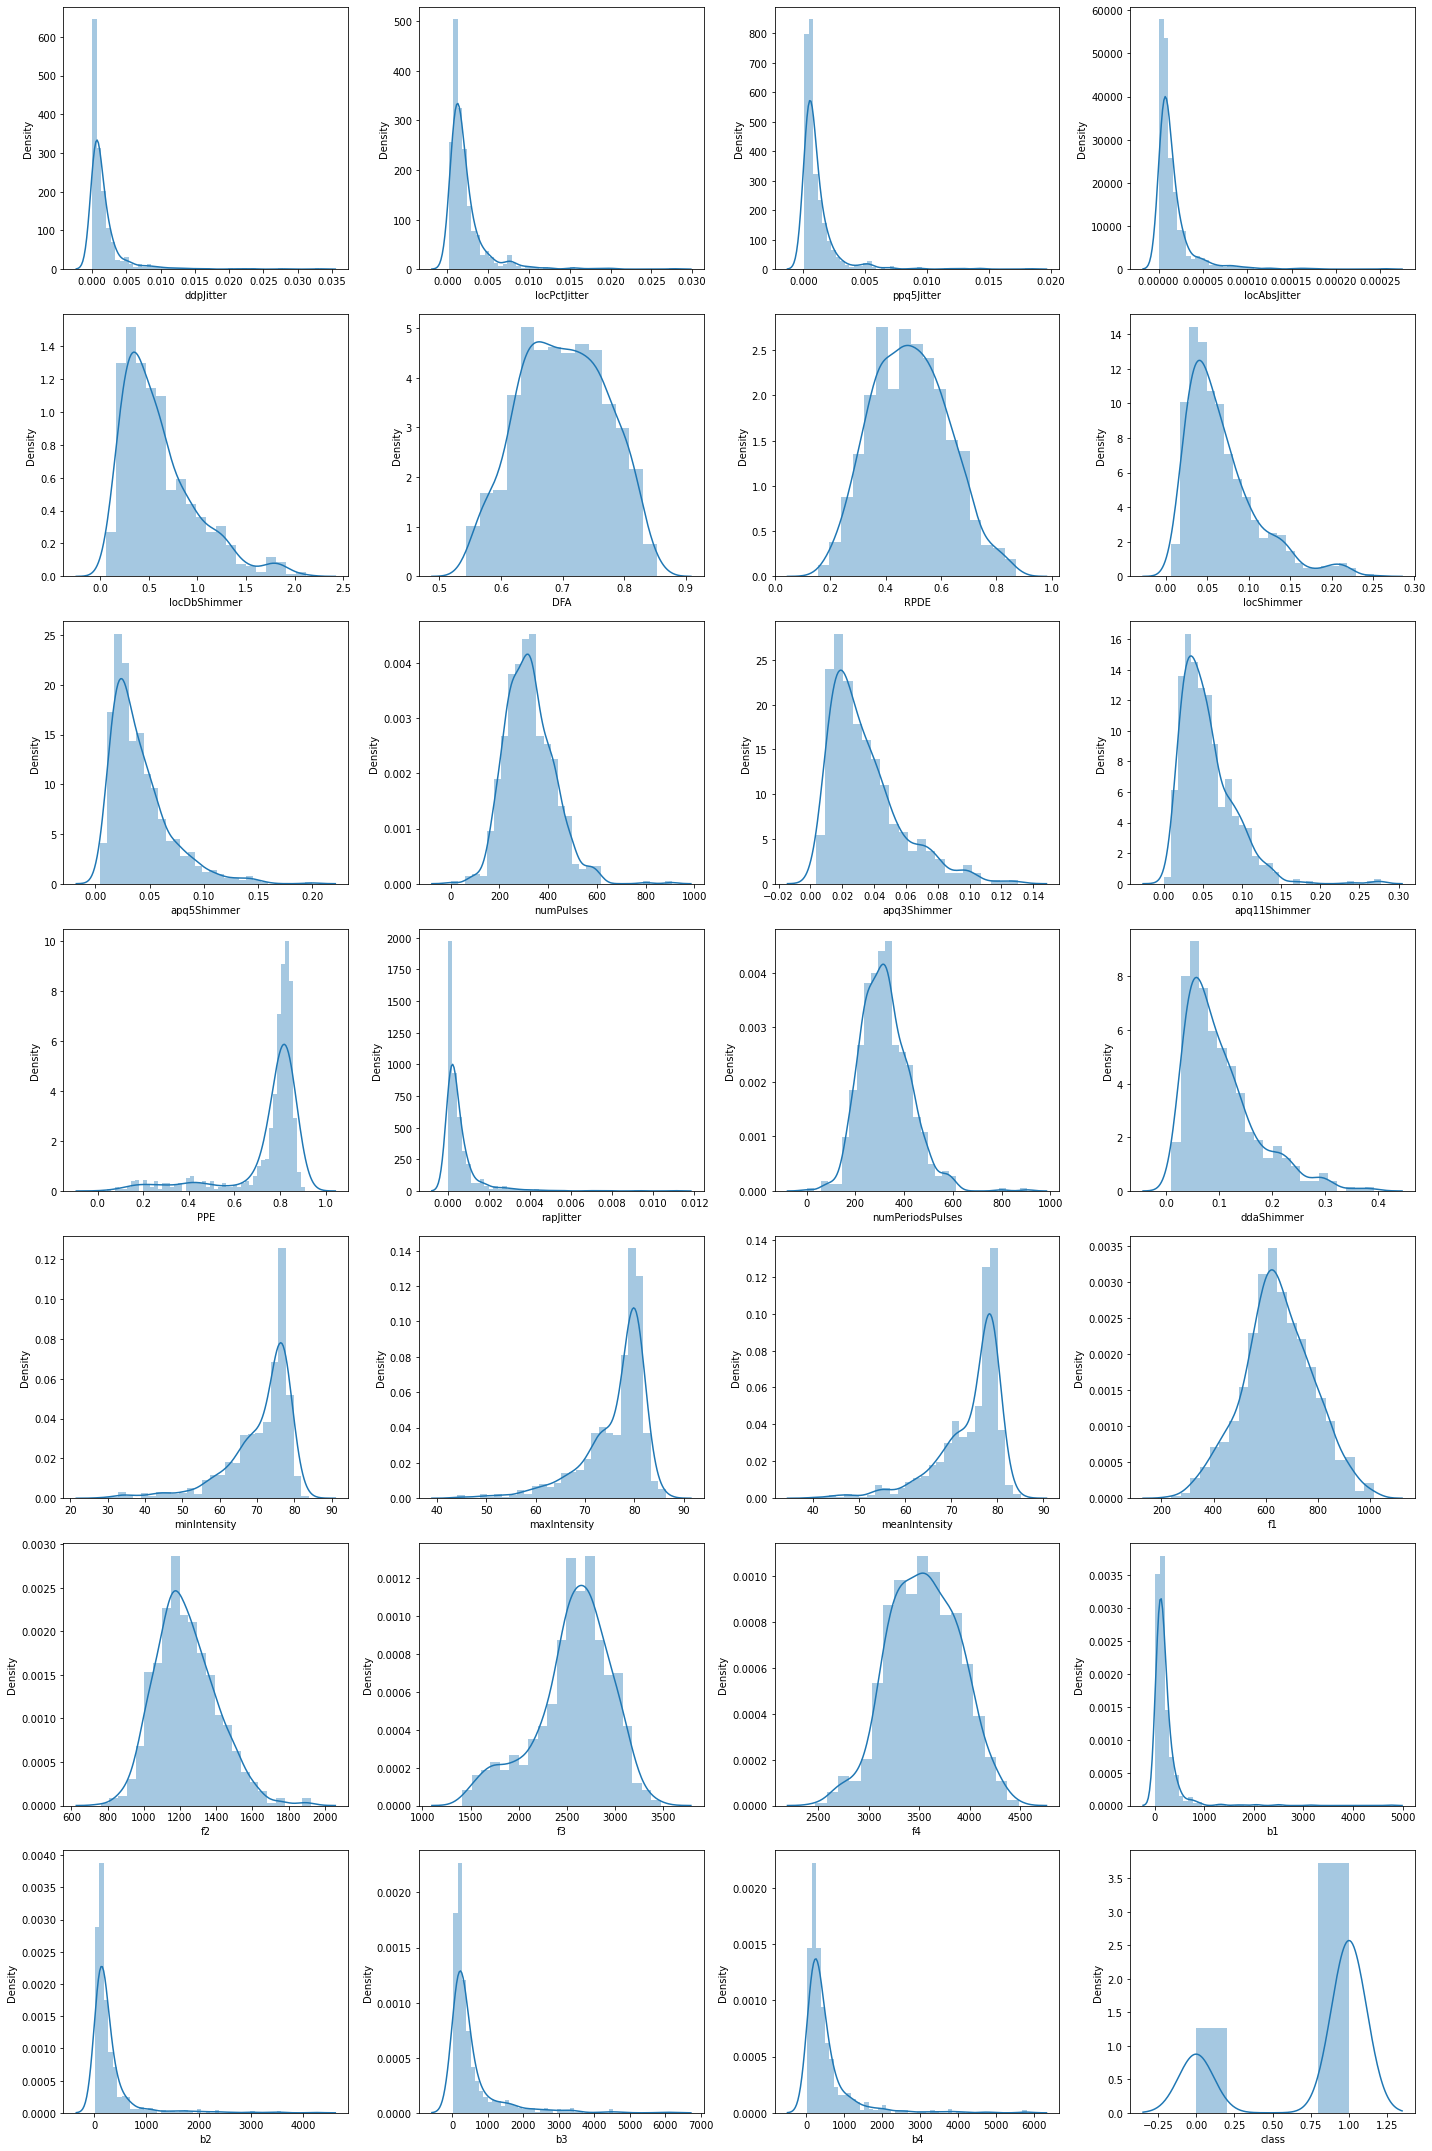

In [20]:
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize = (20, 30))
plotnumber = 1
for col in extracted_df.columns:
    if plotnumber <= len(extracted_df.columns):
        ax = plt.subplot(7, 4, plotnumber)
        sns.distplot(extracted_df[col])
        plt.xlabel(col)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# KDE Plot


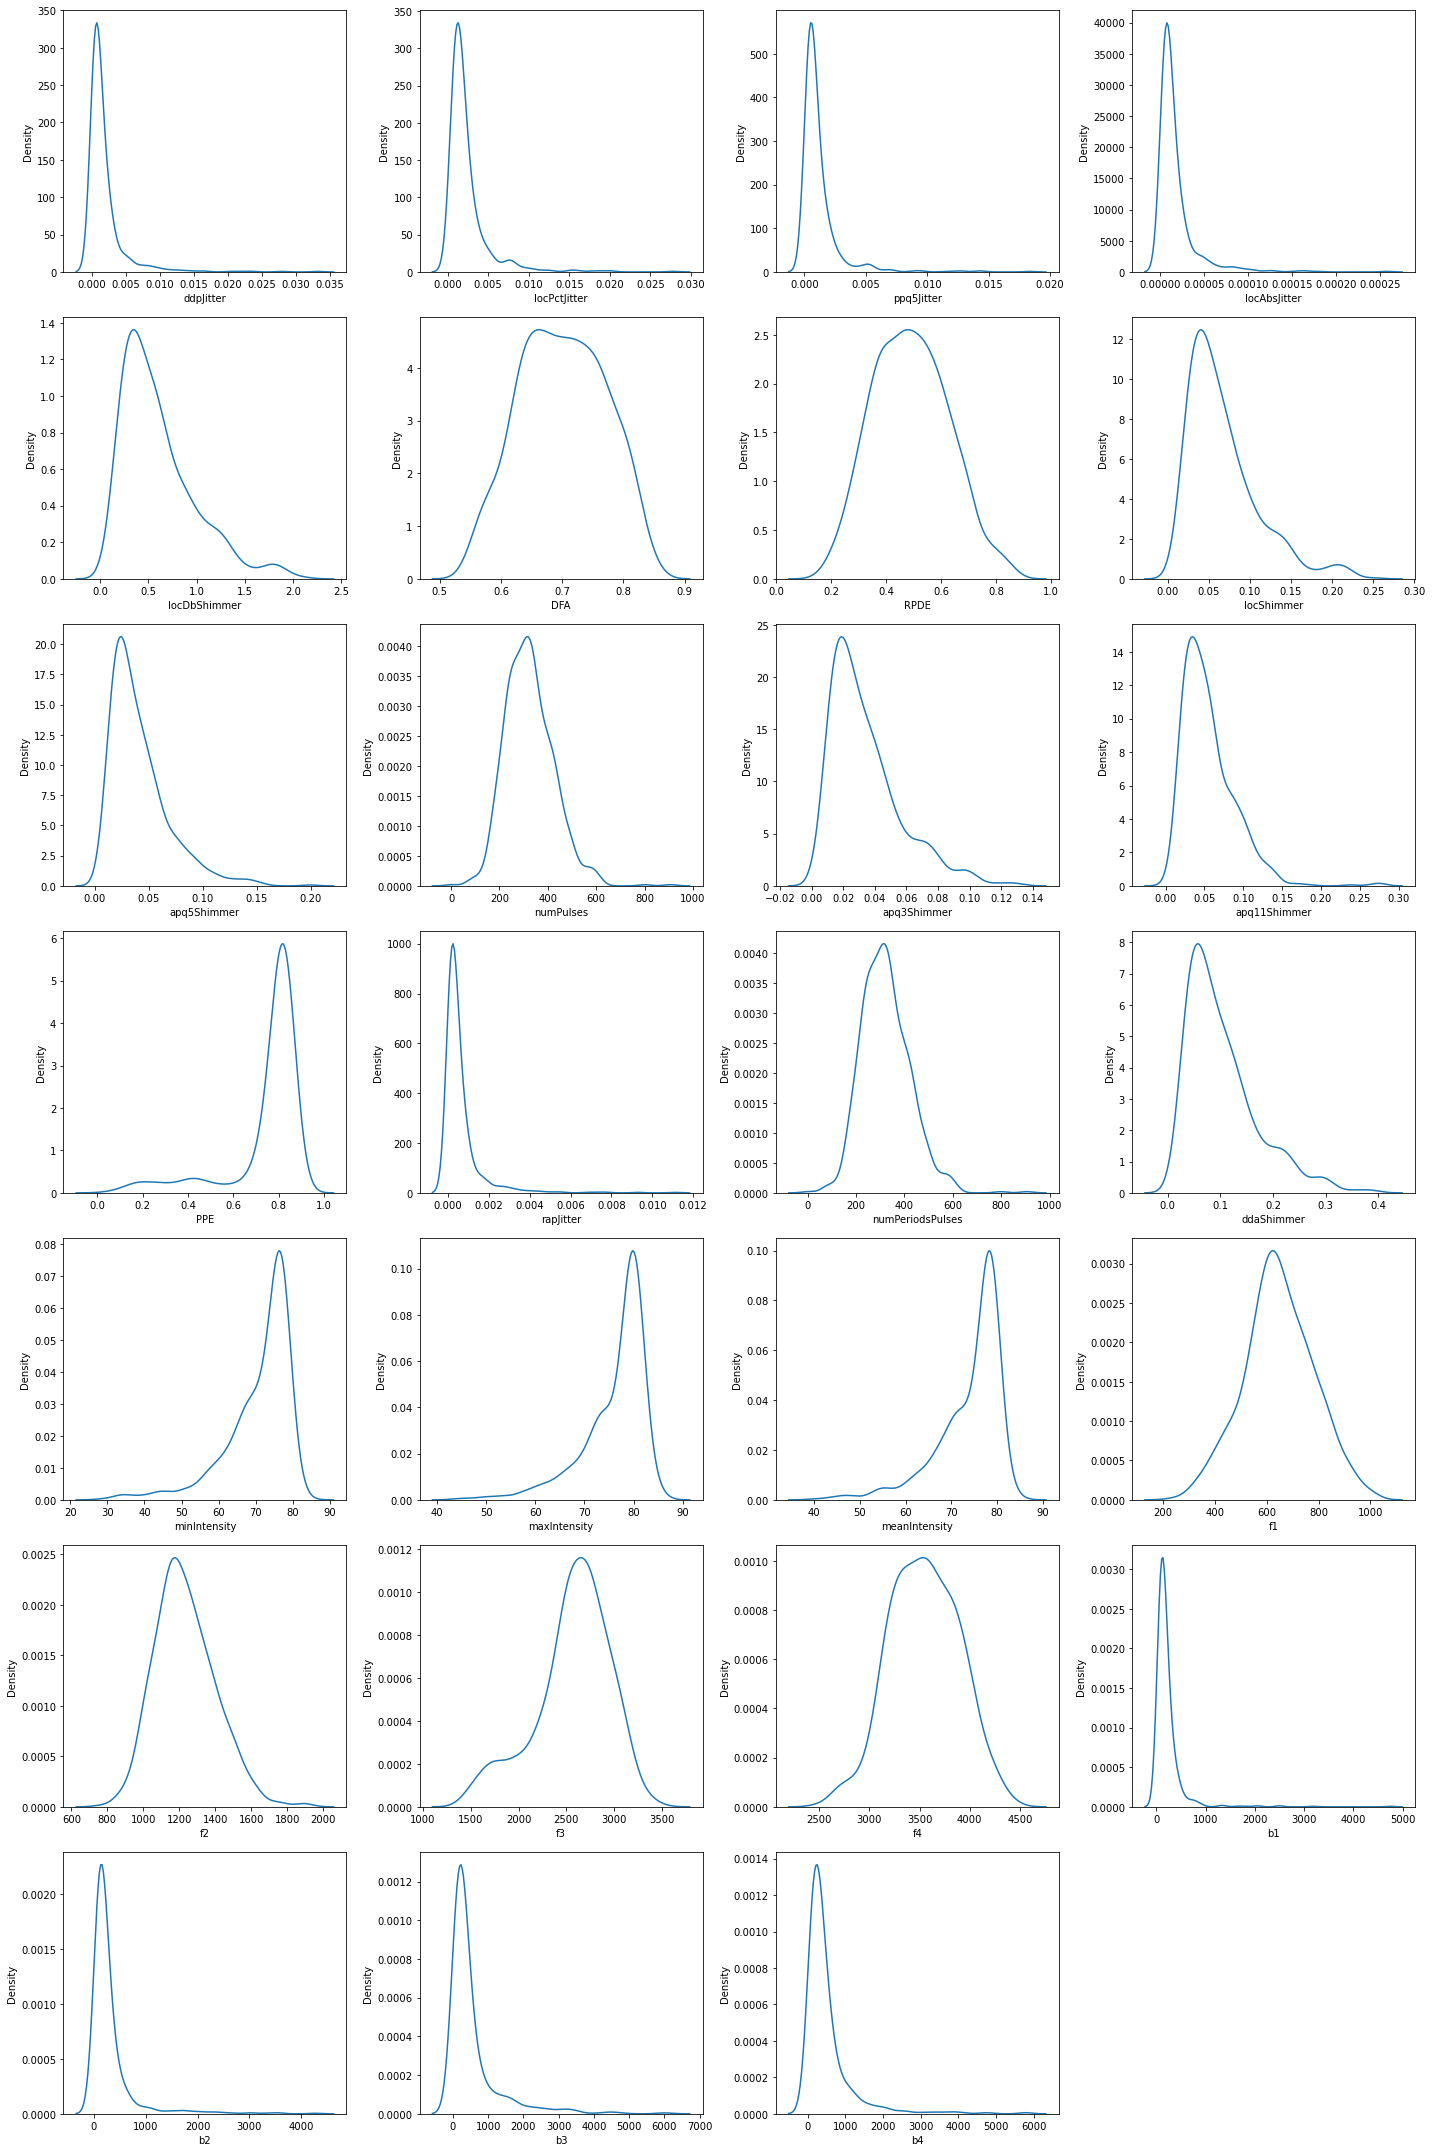

In [21]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.kdeplot(extracted_df[col]) 
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Box Plot

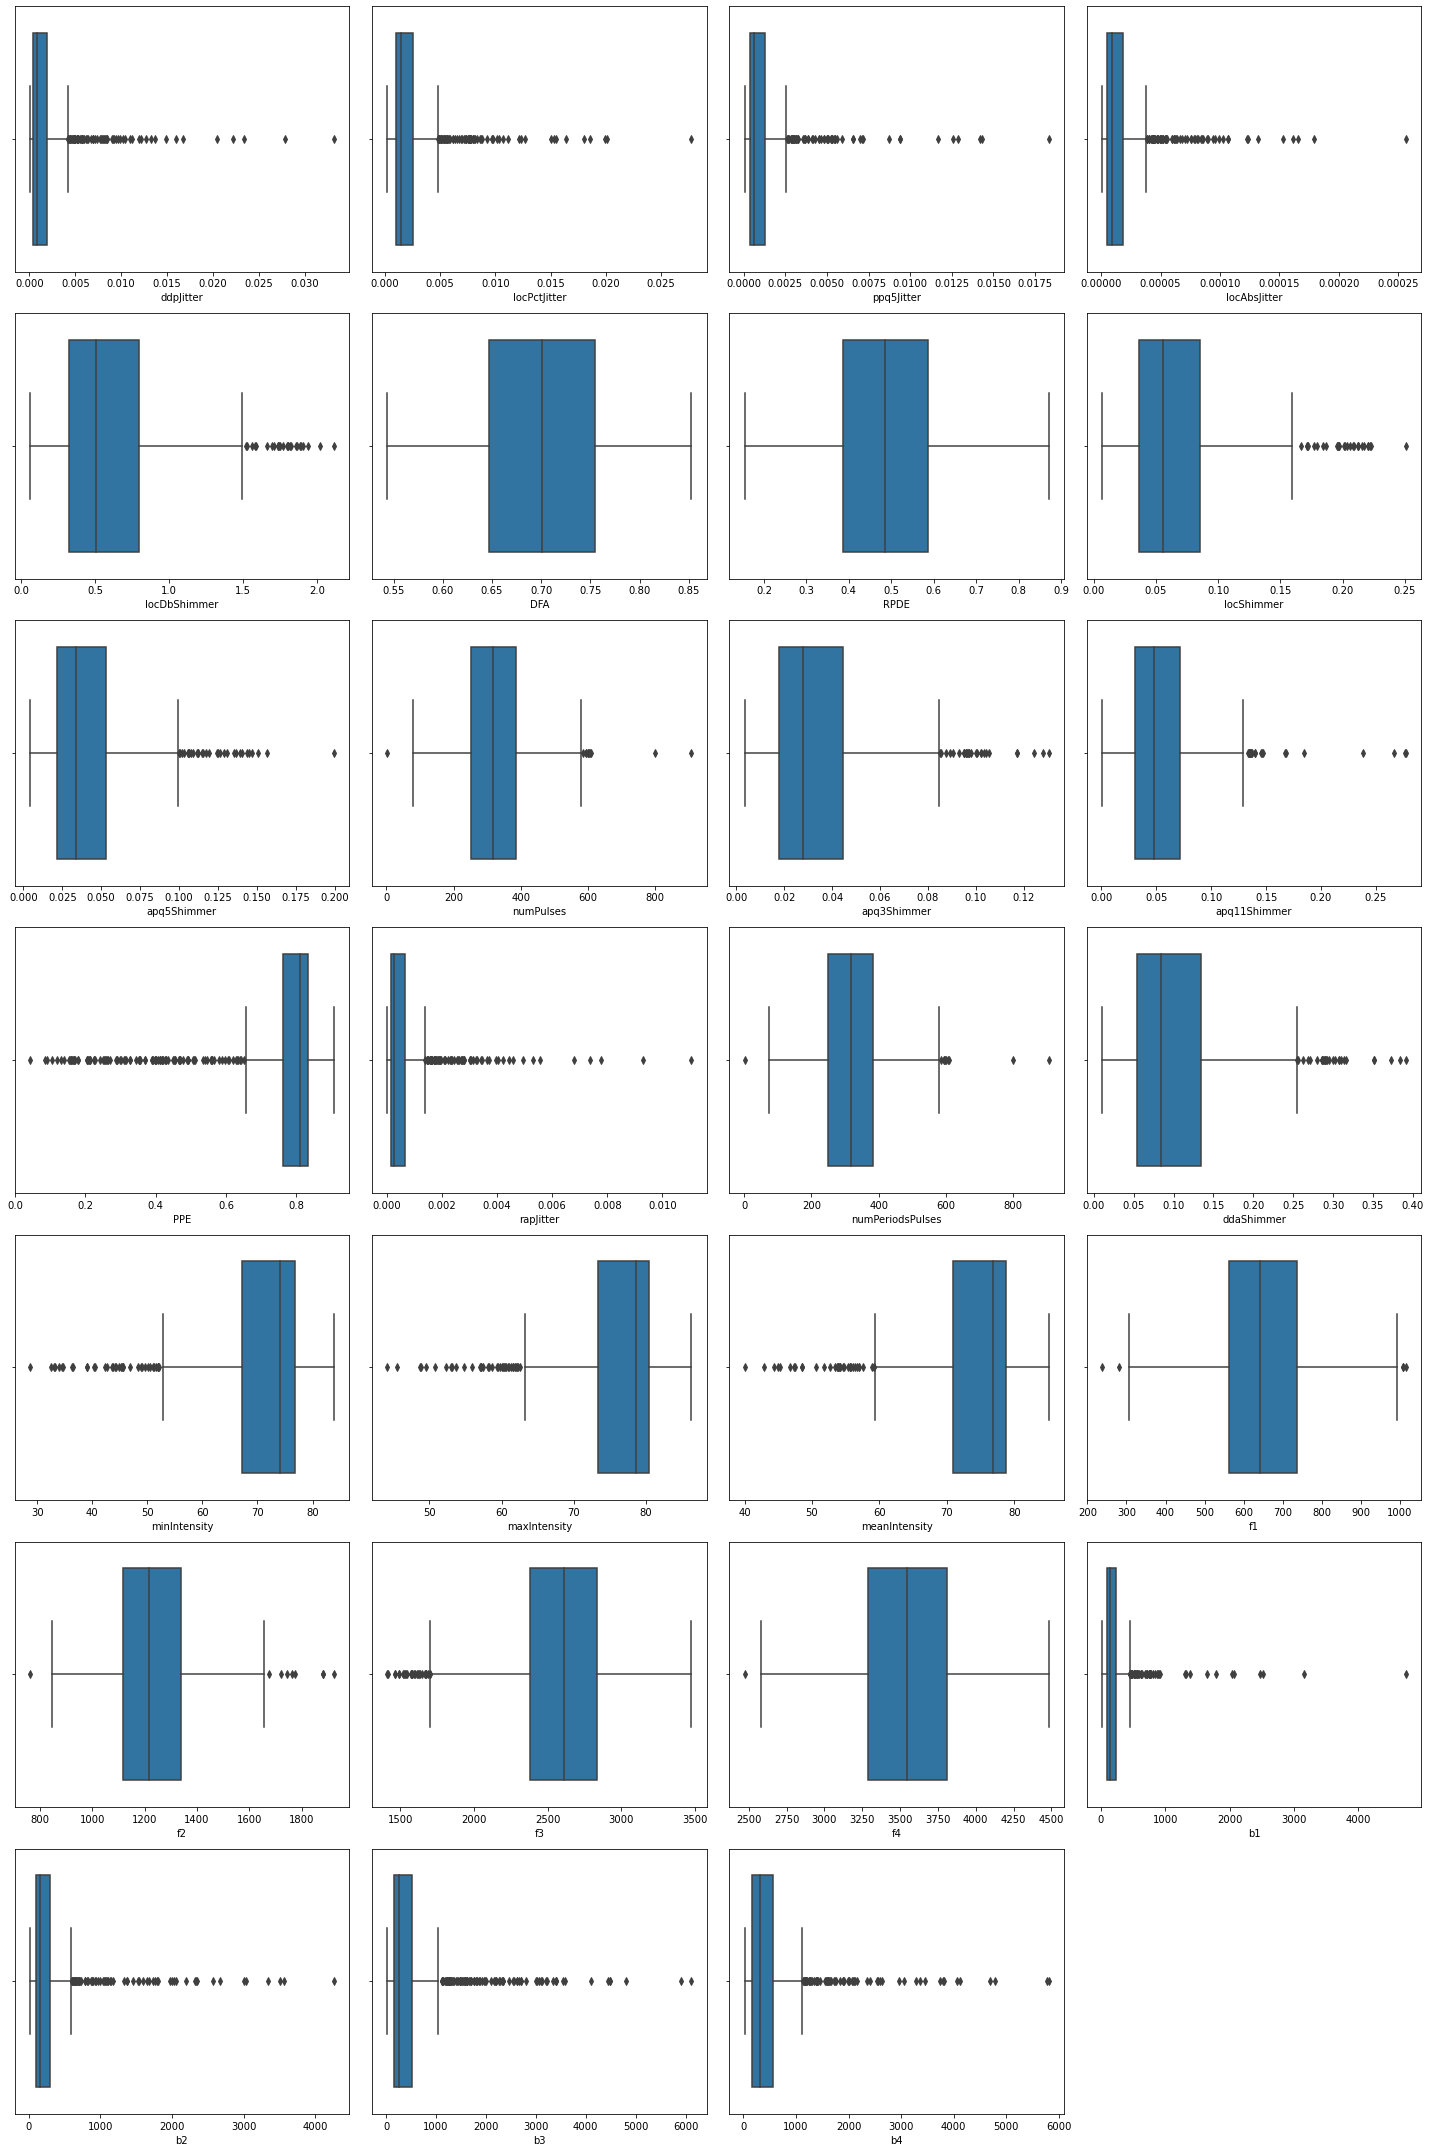

In [22]:
plt.figure(figsize = (20, 30))
plotnumber = 1

for col in extracted_df.columns:
    if plotnumber <= (len(extracted_df.columns)-1):
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x=col, data=extracted_df) 
        plt.xlabel(col)

        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Outliers Detection using Mahalanobis

Mahalonobis computes is the distance between a point and a distribution, not between two distinct points. 

D^2 = (x – m)^T . C^(-1) . (x – m)

where, 
 - D^2        is the square of the Mahalanobis distance. 
 - x          is the vector of the observation (row in a dataset), 
 - m          is the vector of mean values of independent variables (mean of each column), 
 - C^(-1)     is the inverse covariance matrix of independent variables.

In [23]:
extracted_df.shape

(756, 28)

In [24]:
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mean = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    right_term = np.dot(x_minus_mean, inv_covmat)
    mhl_dist = np.dot(right_term, x_minus_mean.T)
    return mhl_dist.diagonal()

df = extracted_df.copy()
df['mahalanobis'] = mahalanobis(x=extracted_df, data=extracted_df)
df.head()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
1,0.00200,0.00218,0.00129,0.000018,0.517,0.71826,0.57227,0.05883,0.03496,240.0,...,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,1.0,12.096627
2,0.00157,0.00195,0.00112,0.000016,0.502,0.69481,0.53966,0.05516,0.03675,234.0,...,564.363615,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,1.0,10.173951
3,0.00171,0.00176,0.00111,0.000015,0.897,0.67604,0.58982,0.09902,0.06497,232.0,...,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,1.0,12.277390
4,0.00446,0.00419,0.00268,0.000046,0.527,0.79672,0.59257,0.05451,0.02857,178.0,...,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,1.0,30.401644
5,0.00499,0.00535,0.00227,0.000044,0.497,0.79782,0.53028,0.05610,0.03327,236.0,...,846.796144,1215.346469,3201.513132,4085.456839,402.216738,210.061394,203.637106,384.611697,1.0,31.652633


Degree of freeedom calculated as,

df = number of independent values — number of statistics
 
Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom, the critical value at a 0.01 significance level and 27 degrees of freedom is computed as:

In [25]:
from scipy.stats import chi2

chi2.ppf((1-0.01), df=27)

46.962942124751436

In [26]:
df.sort_values(by='mahalanobis').head()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
592,0.00051,0.00091,0.00042,0.000005,0.342,0.73097,0.39407,0.03851,0.02347,354.0,...,606.675248,1220.991510,2633.039631,3592.659318,219.297363,265.642813,144.907573,331.417764,1.0,4.363782
493,0.00123,0.00195,0.00095,0.000016,0.355,0.68788,0.54836,0.04060,0.02540,241.0,...,539.234600,1145.702996,2547.753275,3528.597176,96.388296,119.075124,267.707290,169.650348,1.0,4.641476
501,0.00063,0.00127,0.00050,0.000008,0.352,0.73710,0.40519,0.04007,0.02517,305.0,...,623.776458,1343.396584,2482.392535,3425.895113,165.026414,341.946889,395.364962,352.282618,1.0,5.381648
19,0.00075,0.00177,0.00061,0.000012,0.422,0.66085,0.44583,0.04810,0.02692,283.0,...,674.292881,1233.233624,2469.663237,3267.527013,93.289078,69.914097,208.089548,111.941511,1.0,5.562496
476,0.00065,0.00156,0.00058,0.000009,0.276,0.66248,0.38960,0.03136,0.01946,350.0,...,623.567981,1251.661819,2535.129857,3524.027694,101.387349,26.526226,404.335786,220.259996,1.0,5.966387


In [27]:
df.sort_values(by='mahalanobis').tail()

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
426,0.03315,0.02775,0.01832,0.000256,1.769,0.75583,0.84980,0.21727,0.11939,112.0,...,504.181576,1129.639962,2476.732486,3503.107173,350.303297,665.390955,278.458998,675.243011,1.0,222.003644
75,0.00321,0.00333,0.00159,0.000023,0.612,0.70358,0.67909,0.06911,0.04027,286.0,...,682.940115,1384.748256,2455.882070,3606.493448,4744.875736,148.082502,106.685036,209.221940,0.0,269.041993
341,0.02783,0.01800,0.01166,0.000179,1.050,0.72217,0.83083,0.10718,0.04646,94.0,...,635.506805,1273.903318,2598.440113,3699.851517,122.475999,90.754074,181.659901,309.463424,1.0,288.873903
439,0.00669,0.01535,0.00560,0.000166,0.595,0.64908,0.74388,0.06461,0.03936,179.0,...,635.209689,1052.098330,2601.221621,3247.886133,101.442549,166.316045,120.226378,458.157852,1.0,320.139210
471,0.00581,0.00774,0.00263,0.000022,1.862,0.65600,0.59176,0.21267,0.09946,598.0,...,611.695546,1295.739093,2466.917100,3488.932937,132.709051,873.566906,102.991978,171.701106,0.0,335.712709


In [28]:
df.loc[df.mahalanobis > 46.96]

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f1,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis
13,0.00230,0.00280,0.00184,0.000011,1.814,0.78996,0.78026,0.20811,0.14476,492.0,...,493.187329,1256.570863,2337.449029,3320.689784,760.283532,229.348688,198.730042,464.080280,1.0,121.195677
22,0.00731,0.00653,0.00389,0.000047,1.891,0.81029,0.71652,0.22066,0.10565,267.0,...,468.387563,1147.072390,2488.578468,3955.303835,362.006150,334.446582,440.182042,554.072188,1.0,116.033438
23,0.01482,0.01268,0.00499,0.000123,1.246,0.73507,0.75672,0.13048,0.06968,175.0,...,592.568254,1215.341781,2393.936878,3967.050874,175.986911,193.821722,903.106338,875.649543,1.0,161.474176
50,0.00261,0.00360,0.00110,0.000018,1.457,0.70885,0.63610,0.15324,0.10048,385.0,...,680.701195,1193.497792,3045.269942,3890.494202,116.749626,221.102580,206.591216,75.909788,1.0,52.062254
51,0.00270,0.00314,0.00110,0.000015,1.745,0.78348,0.74030,0.20158,0.13676,389.0,...,822.184802,1113.372261,3151.662049,3831.464970,186.555858,661.116939,166.224166,200.656222,1.0,47.195134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.01592,0.01214,0.00938,0.000107,1.694,0.69923,0.84808,0.19636,0.11127,134.0,...,528.066889,1130.970134,2670.498962,3431.545111,88.086813,141.211829,230.695694,147.331447,1.0,91.577831
661,0.00160,0.00199,0.00112,0.000018,0.376,0.71681,0.66809,0.04286,0.02492,209.0,...,609.472639,990.674456,2748.277761,3648.440769,318.849972,163.124257,76.614258,5804.342078,1.0,78.885488
672,0.00695,0.00702,0.00222,0.000049,0.870,0.69699,0.61460,0.09479,0.06080,273.0,...,579.437659,1155.349956,3050.208434,3799.535542,90.553130,71.623747,204.356284,495.549665,1.0,60.403447
680,0.00036,0.00120,0.00032,0.000006,0.301,0.62437,0.50215,0.03328,0.02023,416.0,...,754.205881,1146.548354,2183.598582,3499.971963,113.487132,3000.642166,225.391573,366.825541,1.0,53.255073


We got 9.21 as the critical value which means that an observation can be cosidered as extreme if its Mahalanobis distance exceeds 9.21.

In case, if we want to use P value instead of MHL distance to determine that if an observation is outlier or not:

In [29]:
df['p_value'] = 1 - chi2.cdf(df['mahalanobis'], 27)

In [30]:
# Extreme values with a significance level of 0.01
df.loc[df.p_value < 0.01]

,ddpJitter,locPctJitter,ppq5Jitter,locAbsJitter,locDbShimmer,DFA,RPDE,locShimmer,apq5Shimmer,numPulses,...,f2,f3,f4,b1,b2,b3,b4,class,mahalanobis,p_value
13,0.00230,0.00280,0.00184,0.000011,1.814,0.78996,0.78026,0.20811,0.14476,492.0,...,1256.570863,2337.449029,3320.689784,760.283532,229.348688,198.730042,464.080280,1.0,121.195677,6.739054e-14
22,0.00731,0.00653,0.00389,0.000047,1.891,0.81029,0.71652,0.22066,0.10565,267.0,...,1147.072390,2488.578468,3955.303835,362.006150,334.446582,440.182042,554.072188,1.0,116.033438,5.222489e-13
23,0.01482,0.01268,0.00499,0.000123,1.246,0.73507,0.75672,0.13048,0.06968,175.0,...,1215.341781,2393.936878,3967.050874,175.986911,193.821722,903.106338,875.649543,1.0,161.474176,0.000000e+00
50,0.00261,0.00360,0.00110,0.000018,1.457,0.70885,0.63610,0.15324,0.10048,385.0,...,1193.497792,3045.269942,3890.494202,116.749626,221.102580,206.591216,75.909788,1.0,52.062254,2.607261e-03
51,0.00270,0.00314,0.00110,0.000015,1.745,0.78348,0.74030,0.20158,0.13676,389.0,...,1113.372261,3151.662049,3831.464970,186.555858,661.116939,166.224166,200.656222,1.0,47.195134,9.429681e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.01592,0.01214,0.00938,0.000107,1.694,0.69923,0.84808,0.19636,0.11127,134.0,...,1130.970134,2670.498962,3431.545111,88.086813,141.211829,230.695694,147.331447,1.0,91.577831,5.948921e-09
661,0.00160,0.00199,0.00112,0.000018,0.376,0.71681,0.66809,0.04286,0.02492,209.0,...,990.674456,2748.277761,3648.440769,318.849972,163.124257,76.614258,5804.342078,1.0,78.885488,5.565123e-07
672,0.00695,0.00702,0.00222,0.000049,0.870,0.69699,0.61460,0.09479,0.06080,273.0,...,1155.349956,3050.208434,3799.535542,90.553130,71.623747,204.356284,495.549665,1.0,60.403447,2.334917e-04
680,0.00036,0.00120,0.00032,0.000006,0.301,0.62437,0.50215,0.03328,0.02023,416.0,...,1146.548354,2183.598582,3499.971963,113.487132,3000.642166,225.391573,366.825541,1.0,53.255073,1.874634e-03
